<a href="https://colab.research.google.com/github/SH22Hwang/GNU_AugumentedIntelligenceLab/blob/main/eunsun/chap08lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# LAB 8-1

# tensorflow와 tf.keras를 임포트한다
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
print(train_images.shape)
print(train_labels)
print(test_images.shape)

(60000, 28, 28)
[9 0 0 ... 3 0 5]
(10000, 28, 28)


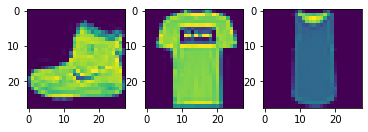

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.imshow(train_images[0])
ax2.imshow(train_images[1])
ax3.imshow(train_images[2])

plt.show()

In [7]:
print(train_labels[:3])

[9 0 0]


In [8]:
# 0-255 구간의 픽셀값을 실수로 정규화한다
train_images, test_images = train_images / 255, test_images / 255
model = keras.models.Sequential([
                                 keras.layers.Flatten(input_shape=(28,28)),
                                 keras.layers.Dropout(0.2),
                                 keras.layers.Dense(128, activation='relu'),
                                 keras.layers.Dense(32, activation='relu'),
                                 keras.layers.Dense(10,activation='softmax'),
])

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, batch_size=64, epochs=10,validation_split=0.25)

Epoch 1/10
704/704 [==============================] - 3s 4ms/step - loss: 0.6002 - accuracy: 0.7874 - val_loss: 0.4404 - val_accuracy: 0.8408
Epoch 2/10
704/704 [==============================] - 3s 4ms/step - loss: 0.4400 - accuracy: 0.8404 - val_loss: 0.4254 - val_accuracy: 0.8449
Epoch 3/10
704/704 [==============================] - 3s 4ms/step - loss: 0.4027 - accuracy: 0.8528 - val_loss: 0.3753 - val_accuracy: 0.8635
Epoch 4/10
704/704 [==============================] - 3s 4ms/step - loss: 0.3758 - accuracy: 0.8616 - val_loss: 0.3589 - val_accuracy: 0.8682
Epoch 5/10
704/704 [==============================] - 2s 4ms/step - loss: 0.3598 - accuracy: 0.8676 - val_loss: 0.3503 - val_accuracy: 0.8729
Epoch 6/10
704/704 [==============================] - 2s 4ms/step - loss: 0.3420 - accuracy: 0.8734 - val_loss: 0.3456 - val_accuracy: 0.8712
Epoch 7/10
704/704 [==============================] - 3s 4ms/step - loss: 0.3319 - accuracy: 0.8764 - val_loss: 0.3381 - val_accuracy: 0.8756
Epoch 

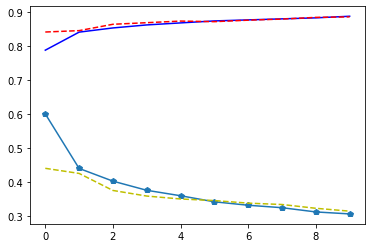

In [12]:
plt.plot(history.history['loss'],'p-')
plt.plot(history.history['val_loss'],'y--')

plt.plot(history.history['accuracy'],'b-')
plt.plot(history.history['val_accuracy'],'r--')

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("테스트 정확도:", test_acc)

313/313 - 0s - loss: 0.3386 - accuracy: 0.8755
테스트 정확도: 0.8755000233650208


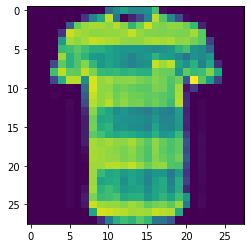

In [14]:
randIdx = np.random.randint(0, 1000)
plt.imshow(test_images[randIdx])

In [15]:
print(test_images[randIdx].shape)
new_image = test_images[randIdx][np.newaxis, :, :]
print(new_image)

yhat = model.predict(new_image)
print(yhat.round(3))

(28, 28)
[[[0.         0.         0.         0.         0.         0.00784314
   0.         0.         0.         0.         0.34901961 0.47843137
   0.56470588 0.47843137 0.47058824 0.50196078 0.70980392 0.03529412
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.00784314 0.         0.
   0.         0.15686275 0.43529412 0.60392157 0.89803922 0.38823529
   0.         0.09803922 0.23137255 0.44705882 0.89803922 0.72941176
   0.47843137 0.23529412 0.02352941 0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.29803922
   0.76862745 0.84705882 0.87058824 0.8627451  0.83921569 0.88627451
   0.81960784 0.65490196 0.78039216 0.9254902  0.81960784 0.80392157
   0.83137255 0.82745098 0.78431373 0.66666667 0.09803922 0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.14

In [16]:
yhat = np.argmax(model.predict(test_images[randIdx][np.newaxis, :, :]))
yhat

0

In [17]:
class_name = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [18]:
print(class_name[yhat])

T-shirt/top


In [19]:
def plot_images(images, labels, images_per_row=5):
  n_images = len(images)
  n_rows = (n_images - 1) // images_per_row + 1
  fig, ax = plt.subplots(n_rows, images_per_row, figsize = (images_per_row * 2, n_rows * 2))

  for i in range(n_rows):
    for j in range(images_per_row):
      if i*images_per_row + j >= n_images: break
      img_idx = i*images_per_row + j
      a_image = images[img_idx].reshape(28,28)
      if n_rows>1 : axis = ax[i,j]
      else: axis = ax[j]
      axis.get_xaxis().set_visible(False)
      axis.get_yaxis().set_visible(False)
      label = class_name[labels[img_idx]]
      axis.set_title(label)
      axis.imshow(a_image, interpolation='nearest')

[9 2 1 1 6 1 4 6 5 7 4 5 8 3 4 1 2 2 8 0 2 5 7 5 1]


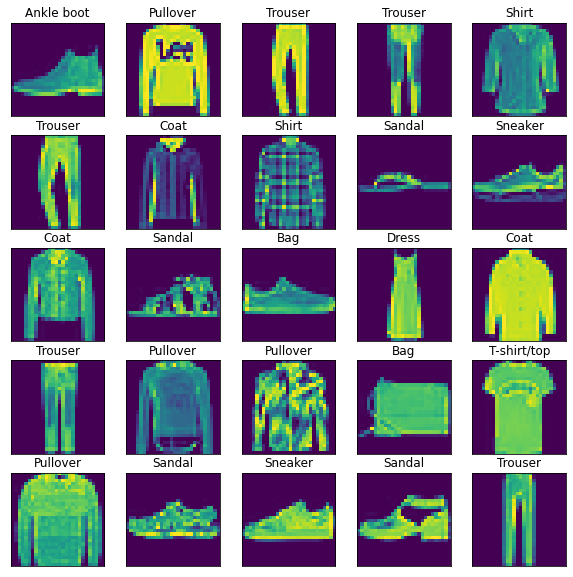

In [20]:
images = test_images[:25]
predictions = np.argmax(model.predict(images), axis=1)
print(predictions)
plot_images(images, predictions, images_per_row = 5)